# Predicting Survival on the Titanic: Data Preparation

## Loading libraries and data

In [29]:
# Import libraries
library(ggplot2)

# Load training dataset
print("Loading training dataset")
train_data <- read.csv("data/train.csv")
print("Done.")

# Print summary of input datasets
print("Summary of training dataset:")

print("Columns:")
names(train_data)

print(paste("No. of training instances:", nrow(train_data)))
print(paste("% positive class (Survived):", sum(train_data$Survived == 1) / nrow(train_data) * 100))
print(paste("% negative class (Not-survived):", sum(train_data$Survived == 0) / nrow(train_data) * 100))

summary(train_data)

[1] "Loading training dataset"
[1] "Done."
[1] "Summary of training dataset:"
[1] "Columns:"


[1] "PassengerId" "Survived"    "Pclass"      "Name"        "Sex"        
 [6] "Age"         "SibSp"       "Parch"       "Ticket"      "Fare"       
[11] "Cabin"       "Embarked"

[1] "No. of training instances: 891"
[1] "% positive class (Survived): 38.3838383838384"
[1] "% negative class (Not-survived): 61.6161616161616"


  PassengerId       Survived          Pclass     
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000  
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000  
 Median :446.0   Median :0.0000   Median :3.000  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309  
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000  
 Max.   :891.0   Max.   :1.0000   Max.   :3.000  
                                                 
                                    Name         Sex           Age       
 Abbing, Mr. Anthony                  :  1   female:314   Min.   : 0.42  
 Abbott, Mr. Rossmore Edward          :  1   male  :577   1st Qu.:20.12  
 Abbott, Mrs. Stanton (Rosa Hunt)     :  1                Median :28.00  
 Abelson, Mr. Samuel                  :  1                Mean   :29.70  
 Abelson, Mrs. Samuel (Hannah Wizosky):  1                3rd Qu.:38.00  
 Adahl, Mr. Mauritz Nils Martin       :  1                Max.   :80.00  
 (Other)                              :885                NA's   :177    
     Sib

## Feature Selection

Each variable in the dataset is analyzed, transformed if needed, and added to the feature set for training. In some cases, multiple derived features are extracted out of a variable. 

### Analysis of variable: Pclass 

[1] "Data type: integer"
[1] "Summary:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   2.309   3.000   3.000 

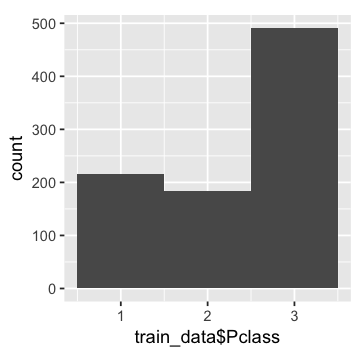

In [30]:
print(paste("Data type:", class(train_data$Pclass)))
print("Summary:")
summary(train_data$Pclass)
options(repr.plot.width=3, repr.plot.height=3)
qplot(train_data$Pclass, bins=3, asp=1)

#### Observations

* Skew in the data: significantly more number of the observations have value 3  

#### Transformations

* None. Added to feature list as it is


In [31]:
features <- data.frame(Pclass=as.integer(train_data$Pclass))
summary(features)

     Pclass     
 Min.   :1.000  
 1st Qu.:2.000  
 Median :3.000  
 Mean   :2.309  
 3rd Qu.:3.000  
 Max.   :3.000  

### Analyzing variable: Name

In [32]:
print(paste("Data type:", class(train_data$Name)))
print(paste("No. of unique namess:", length(levels(train_data$Name))))
print(paste("Missing Data:", any(is.na(train_data$Name)) || is.null(train_data$Name)))
print("Samnple:")
print(as.character(train_data$Name[1:5]))

[1] "Data type: factor"
[1] "No. of unique namess: 891"
[1] "Missing Data: FALSE"
[1] "Samnple:"
[1] "Braund, Mr. Owen Harris"                            
[2] "Cumings, Mrs. John Bradley (Florence Briggs Thayer)"
[3] "Heikkinen, Miss. Laina"                             
[4] "Futrelle, Mrs. Jacques Heath (Lily May Peel)"       
[5] "Allen, Mr. William Henry"                           


#### Observations

* Can possibly extract out last name and title as separate features
* First name probably does not matter at all
* Another name in paranthesis in some cases that could possibily be a related person in the ship

#### Transformations

* Extract last name and title and add them as separate features

In [33]:
NameSplit <- strsplit(as.character(train_data$Name),", ")

LastName <- sapply(NameSplit, function(x) return(x[1]))
print(paste("No. of unique last names:", length(unique(LastName))))

NameSplit <- sapply(NameSplit, function(x) return(x[2]))
NameSplit <- strsplit(NameSplit,". ")

NameTitle <- as.factor(sapply(NameSplit, function(x) return(x[1])))
print("Summary of name titles:")
summary(NameTitle)

[1] "No. of unique last names: 667"
[1] "Summary of name titles:"


Capt      Col      Don       Dr Jonkheer     Lady    Major   Master 
       1        2        1        7        1        1        2       40 
    Miss     Mlle      Mme       Mr      Mrs       Ms      Rev      Sir 
     182        2        1      517      125        1        6        1 
      th 
       1

In [34]:
features$LastName <- as.factor(LastName)
features$NameTitle <- as.factor(NameTitle)
summary(features)

     Pclass           LastName     NameTitle  
 Min.   :1.000   Andersson:  9   Mr     :517  
 1st Qu.:2.000   Sage     :  7   Miss   :182  
 Median :3.000   Carter   :  6   Mrs    :125  
 Mean   :2.309   Goodwin  :  6   Master : 40  
 3rd Qu.:3.000   Johnson  :  6   Dr     :  7  
 Max.   :3.000   Panula   :  6   Rev    :  6  
                 (Other)  :851   (Other): 14  

### Analyzing variable: Sex

In [35]:
print(paste("Data type:", class(train_data$Sex)))
print("Summary:")
summary(train_data$Sex)

[1] "Data type: factor"
[1] "Summary:"


female   male 
   314    577

#### Observations

* More men than women

#### Transformations

* None. Add to features as it is.

In [36]:
features$Sex <- train_data$Sex
summary(features)

     Pclass           LastName     NameTitle       Sex     
 Min.   :1.000   Andersson:  9   Mr     :517   female:314  
 1st Qu.:2.000   Sage     :  7   Miss   :182   male  :577  
 Median :3.000   Carter   :  6   Mrs    :125               
 Mean   :2.309   Goodwin  :  6   Master : 40               
 3rd Qu.:3.000   Johnson  :  6   Dr     :  7               
 Max.   :3.000   Panula   :  6   Rev    :  6               
                 (Other)  :851   (Other): 14               

### Analyzing variable: Age

[1] "Data type: numeric"
[1] "Summary:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.42   20.12   28.00   29.70   38.00   80.00     177 

[1] "% Missing data: 19.8653198653199"
[1] "% Missing data (Survived): 29.3785310734463"
[1] "% Missing data (Not Survived): 70.6214689265537"
[1] "Median Age: 28"
[1] "Median Age (Survived): 28"
[1] "Median Age (Not Survived): 28"
[1] "% kids (<18 yrs): 32.5476992143659"
[1] "% elders (>60 yrs): 22.334455667789"


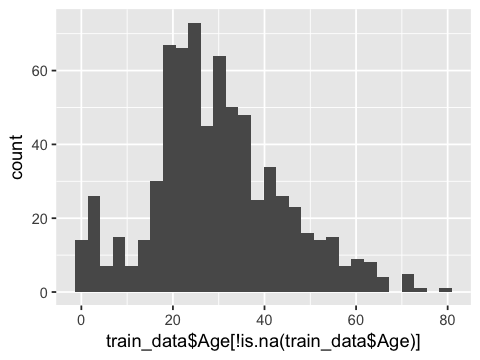

In [37]:
print(paste("Data type:", class(train_data$Age)))
print("Summary:")
summary(train_data$Age)

print(paste("% Missing data:", sum(is.na(train_data$Age), na.rm=TRUE)/length(train_data$Age)*100))
print(paste("% Missing data (Survived):", sum(train_data$Survived[is.na(train_data$Age)])
                                                    /sum(is.na(train_data$Age))*100))
print(paste("% Missing data (Not Survived):", sum(train_data$Survived[is.na(train_data$Age)]==0)
                                                    /sum(is.na(train_data$Age))*100))

print(paste("Median Age:", median(train_data$Age, na.rm=TRUE)))
print(paste("Median Age (Survived):", median(train_data$Age[train_data$Survived == 1], na.rm=TRUE)))
print(paste("Median Age (Not Survived):", median(train_data$Age[train_data$Survived == 0], na.rm=TRUE)))

print(paste("% kids (<18 yrs):", length(train_data$Age[train_data$Age < 18])/length(train_data$Age)*100))
print(paste("% elders (>60 yrs):", length(train_data$Age[train_data$Age > 60])/length(train_data$Age)*100))

options(repr.plot.width=4, repr.plot.height=3)
qplot(train_data$Age[!is.na(train_data$Age)], bins=30)

#### Observations

* ~20% data missing - ~30% of which in Survived category and the rest in Not Survived category
* Median Age is 28 for both categories
* More than 50% of passengers are kids (<18 yrs) or elders (>60 yrs)

#### Transformations

* Replace missing data with median age of the respective category.

In [38]:
Age <- train_data$Age
Age[is.na(train_data$Age) & train_data$Survived == 1] <- median(train_data$Age[train_data$Survived == 1], na.rm=TRUE)
Age[is.na(train_data$Age) & train_data$Survived == 0] <- median(train_data$Age[train_data$Survived == 0], na.rm=TRUE)
features$Age <- as.integer(Age)
summary(features)

     Pclass           LastName     NameTitle       Sex           Age       
 Min.   :1.000   Andersson:  9   Mr     :517   female:314   Min.   : 0.00  
 1st Qu.:2.000   Sage     :  7   Miss   :182   male  :577   1st Qu.:22.00  
 Median :3.000   Carter   :  6   Mrs    :125                Median :28.00  
 Mean   :2.309   Goodwin  :  6   Master : 40                Mean   :29.35  
 3rd Qu.:3.000   Johnson  :  6   Dr     :  7                3rd Qu.:35.00  
 Max.   :3.000   Panula   :  6   Rev    :  6                Max.   :80.00  
                 (Other)  :851   (Other): 14                               

### Analyzing variable: SibSp

In [39]:
print(paste("Data type:", class(train_data$SibSp)))
print("Summary:")
summary(train_data$SibSp)
print(paste("% Passengers with Siblings/ Spouses:", nrow(train_data[train_data$SibSp > 0,]) / nrow(train_data) * 100))

[1] "Data type: integer"
[1] "Summary:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   0.523   1.000   8.000 

[1] "% Passengers with Siblings/ Spouses: 31.7620650953984"


#### Observations

* % ~31% Passengers had Siblings/ Spouses

#### Transformations

* None. Add to feature list as it is.

In [40]:
features$SibSp <- train_data$SibSp
summary(features)

     Pclass           LastName     NameTitle       Sex           Age       
 Min.   :1.000   Andersson:  9   Mr     :517   female:314   Min.   : 0.00  
 1st Qu.:2.000   Sage     :  7   Miss   :182   male  :577   1st Qu.:22.00  
 Median :3.000   Carter   :  6   Mrs    :125                Median :28.00  
 Mean   :2.309   Goodwin  :  6   Master : 40                Mean   :29.35  
 3rd Qu.:3.000   Johnson  :  6   Dr     :  7                3rd Qu.:35.00  
 Max.   :3.000   Panula   :  6   Rev    :  6                Max.   :80.00  
                 (Other)  :851   (Other): 14                               
     SibSp      
 Min.   :0.000  
 1st Qu.:0.000  
 Median :0.000  
 Mean   :0.523  
 3rd Qu.:1.000  
 Max.   :8.000  
                

### Analyzing variable: Parch

In [41]:
print(paste("Data type:", class(train_data$Parch)))
print("Summary:")
summary(train_data$Parch)
print(paste("% Passengers with Parents/ Children:", nrow(train_data[train_data$Parch > 0,]) / nrow(train_data) * 100))

[1] "Data type: integer"
[1] "Summary:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.3816  0.0000  6.0000 

[1] "% Passengers with Parents/ Children: 23.9057239057239"


#### Observations

* ~24% passengers had Parents/ Children travelling with them

#### Transformations

* None. Add to feature list as it is.

In [42]:
features$Parch <- train_data$Parch
summary(features)

     Pclass           LastName     NameTitle       Sex           Age       
 Min.   :1.000   Andersson:  9   Mr     :517   female:314   Min.   : 0.00  
 1st Qu.:2.000   Sage     :  7   Miss   :182   male  :577   1st Qu.:22.00  
 Median :3.000   Carter   :  6   Mrs    :125                Median :28.00  
 Mean   :2.309   Goodwin  :  6   Master : 40                Mean   :29.35  
 3rd Qu.:3.000   Johnson  :  6   Dr     :  7                3rd Qu.:35.00  
 Max.   :3.000   Panula   :  6   Rev    :  6                Max.   :80.00  
                 (Other)  :851   (Other): 14                               
     SibSp           Parch       
 Min.   :0.000   Min.   :0.0000  
 1st Qu.:0.000   1st Qu.:0.0000  
 Median :0.000   Median :0.0000  
 Mean   :0.523   Mean   :0.3816  
 3rd Qu.:1.000   3rd Qu.:0.0000  
 Max.   :8.000   Max.   :6.0000  
                                 

### Analyzing variable: Ticket

In [43]:
print(paste("Data type:", class(train_data$Ticket)))
print(paste("No. of levels:", length(levels(train_data$Ticket))))
print("Sample:")
train_data$Ticket[1:10]

[1] "Data type: factor"
[1] "No. of levels: 681"
[1] "Sample:"


[1] A/5 21171        PC 17599         STON/O2. 3101282 113803          
 [5] 373450           330877           17463            349909          
 [9] 347742           237736          
681 Levels: 110152 110413 110465 110564 110813 111240 111320 111361 ... WE/P 5735

#### Observations

* Consists of a string prefix followed by a ticket number
* Could be worth it to split into two features - TktStr and TktNum

#### Transformations

* Split into TktNum and TktStr

In [44]:
TktSplit <- strsplit(as.character(train_data$Ticket), " ")

oldw <- getOption("warn")
options(warn=-1)
TktNum <- sapply(TktSplit, function(x) {
                                        if(!is.na(as.integer(x[length(x)])))
                                            return(x[length(x)])
                                        else
                                            return(NA)
                                    })
options(warn=oldw)
                                            
TktNum <- as.integer(TktNum)
print(paste("No. of missing data in TktNum:", sum(is.na(TktNum))))
                                                                                    
TktStr <- gsub("[ ]*[0-9]*$", "", as.character(train_data$Ticket))
TktStr[TktStr == ""] <- NA
TktStr <- as.factor(TktStr)
                                            
print("Summary of TktStr:")
summary(TktStr)

[1] "No. of missing data in TktNum: 4"
[1] "Summary of TktStr:"


A./5.        A.5.         A/4        A/4.         A/5        A/5. 
          2           2           3           3          10           7 
        A/S         A4.           C        C.A.  C.A./SOTON          CA 
          1           1           5          27           1           6 
        CA.        F.C.      F.C.C.          Fa        LINE        P/PP 
          8           1           5           1           4           2 
         PC          PP   S.C./A.4.  S.C./PARIS   S.O./P.P.      S.O.C. 
         60           3           1           2           3           5 
     S.O.P.        S.P.     S.W./PP          SC       SC/AH SC/AH Basle 
          1           1           1           1           2           1 
   SC/Paris    SC/PARIS       SCO/W        SO/C  SOTON/O.Q.    SOTON/O2 
          4           5           1           1           8           2 
   SOTON/OQ   STON/O 2.    STON/O2.       SW/PP       W./C.      W.E.P. 
          7          12           6           1           9           1 
        W/C        WE/P        NA's 
          1           2         661

* As you can see, there are some categories which are the same but classified as different because of special characters in the string or character case
  * E.g., SC/Paris = SC/PARIS, W./C. = W/C etc.
* Removing special characters from TktStr and converting all characters into upper case

In [45]:
TktStr <- as.factor(toupper(gsub("[^A-Za-z0-9]", "", as.character(TktStr))))
summary(TktStr)

A4        A5        AS         C        CA   CASOTON        FA        FC 
        7        21         1         5        41         1         1         1 
      FCC      LINE        PC        PP       PPP        SC      SCA4      SCAH 
        5         4        60         3         2         1         1         2 
SCAHBASLE      SCOW   SCPARIS       SOC       SOP      SOPP   SOTONO2   SOTONOQ 
        1         1        11         6         1         3         2        15 
       SP    STONO2      SWPP        WC       WEP      NA's 
        1        18         2        10         3       661

In [46]:
features$TktStr <- TktStr
features$TktNum <- TktNum
summary(features)

     Pclass           LastName     NameTitle       Sex           Age       
 Min.   :1.000   Andersson:  9   Mr     :517   female:314   Min.   : 0.00  
 1st Qu.:2.000   Sage     :  7   Miss   :182   male  :577   1st Qu.:22.00  
 Median :3.000   Carter   :  6   Mrs    :125                Median :28.00  
 Mean   :2.309   Goodwin  :  6   Master : 40                Mean   :29.35  
 3rd Qu.:3.000   Johnson  :  6   Dr     :  7                3rd Qu.:35.00  
 Max.   :3.000   Panula   :  6   Rev    :  6                Max.   :80.00  
                 (Other)  :851   (Other): 14                               
     SibSp           Parch            TktStr        TktNum       
 Min.   :0.000   Min.   :0.0000   PC     : 60   Min.   :      3  
 1st Qu.:0.000   1st Qu.:0.0000   CA     : 41   1st Qu.:  14879  
 Median :0.000   Median :0.0000   A5     : 21   Median : 112277  
 Mean   :0.523   Mean   :0.3816   STONO2 : 18   Mean   : 298328  
 3rd Qu.:1.000   3rd Qu.:0.0000   SOTONOQ: 15   3rd Qu.: 34708

### Analyzing variable: Fare

In [47]:
print(paste("Data type:", class(train_data$Fare)))
print("Summary:")
summary(train_data$Fare)

[1] "Data type: numeric"
[1] "Summary:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    7.91   14.45   32.20   31.00  512.33 

#### Observations

* None

#### Transformations

* None. Adding to feature list as it is.

In [48]:
features$Fare <- train_data$Fare
summary(features)

     Pclass           LastName     NameTitle       Sex           Age       
 Min.   :1.000   Andersson:  9   Mr     :517   female:314   Min.   : 0.00  
 1st Qu.:2.000   Sage     :  7   Miss   :182   male  :577   1st Qu.:22.00  
 Median :3.000   Carter   :  6   Mrs    :125                Median :28.00  
 Mean   :2.309   Goodwin  :  6   Master : 40                Mean   :29.35  
 3rd Qu.:3.000   Johnson  :  6   Dr     :  7                3rd Qu.:35.00  
 Max.   :3.000   Panula   :  6   Rev    :  6                Max.   :80.00  
                 (Other)  :851   (Other): 14                               
     SibSp           Parch            TktStr        TktNum       
 Min.   :0.000   Min.   :0.0000   PC     : 60   Min.   :      3  
 1st Qu.:0.000   1st Qu.:0.0000   CA     : 41   1st Qu.:  14879  
 Median :0.000   Median :0.0000   A5     : 21   Median : 112277  
 Mean   :0.523   Mean   :0.3816   STONO2 : 18   Mean   : 298328  
 3rd Qu.:1.000   3rd Qu.:0.0000   SOTONOQ: 15   3rd Qu.: 34708

### Analyzing variable: Cabin

In [49]:
print(paste("Data type:", class(train_data$Cabin)))
print(paste("No. of levels:", length(levels(train_data$Cabin))))
print(paste("% Data Missing:", sum(train_data$Cabin == "") / length(train_data$Cabin) * 100))
print(paste("% Data Missing (Survived):", sum(train_data$Cabin == "" & train_data$Survived == 1) 
                                            / sum(train_data$Survived == 1) * 100))
print(paste("% Data Missing (Not Survived):", sum(train_data$Cabin == "" & train_data$Survived == 0) 
                                            / sum(train_data$Survived == 0) * 100))
print("Data:")
as.character(train_data$Cabin)

[1] "Data type: factor"
[1] "No. of levels: 148"
[1] "% Data Missing: 77.1043771043771"
[1] "% Data Missing (Survived): 60.233918128655"
[1] "% Data Missing (Not Survived): 87.6138433515483"
[1] "Data:"


[1] ""                "C85"             ""                "C123"           
  [5] ""                ""                "E46"             ""               
  [9] ""                ""                "G6"              "C103"           
 [13] ""                ""                ""                ""               
 [17] ""                ""                ""                ""               
 [21] ""                "D56"             ""                "A6"             
 [25] ""                ""                ""                "C23 C25 C27"    
 [29] ""                ""                ""                "B78"            
 [33] ""                ""                ""                ""               
 [37] ""                ""                ""                ""               
 [41] ""                ""                ""                ""               
 [45] ""                ""                ""                ""               
 [49] ""                ""                ""                ""               
 [53] "D33"             ""                "B30"             "C52"            
 [57] ""                ""                ""                ""               
 [61] ""                "B28"             "C83"             ""               
 [65] ""                ""                "F33"             ""               
 [69] ""                ""                ""                ""               
 [73] ""                ""                ""                "F G73"          
 [77] ""                ""                ""                ""               
 [81] ""                ""                ""                ""               
 [85] ""                ""                ""                ""               
 [89] "C23 C25 C27"     ""                ""                ""               
 [93] "E31"             ""                ""                ""               
 [97] "A5"              "D10 D12"         ""                ""               
[101] ""                ""                "D26"             ""               
[105] ""                ""                ""                ""               
[109] ""                ""                "C110"            ""               
[113] ""                ""                ""                ""               
[117] ""                ""                "B58 B60"         ""               
[121] ""                ""                ""                "E101"           
[125] "D26"             ""                ""                ""               
[129] "F E69"           ""                ""                ""               
[133] ""                ""                ""                ""               
[137] "D47"             "C123"            ""                "B86"            
[141] ""                ""                ""                ""               
[145] ""                ""                ""                ""               
[149] "F2"              ""                ""                "C2"             
[153] ""                ""                ""                ""               
[157] ""                ""                ""                ""               
[161] ""                ""                ""                ""               
[165] ""                ""                "E33"             ""               
[169] ""                ""                "B19"             ""               
[173] ""                ""                "A7"              ""               
[177] ""                "C49"             ""                ""               
[181] ""                ""                ""                "F4"             
[185] ""                "A32"             ""                ""               
[189] ""                ""                ""                ""               
[193] ""                "F2"              "B4"              "B80"            
[197] ""                ""                ""                ""               
[201] ""                ""                ""                ""               
[205] ""                

#### Observations

* Data missing in 77% of passengers 
* An alphabet followed by a number
* Only an alphabet in some cases
* In some cases, multiple of such strings

#### Transformations

* Split into CabinStr and CabinNum
* In cases where there are multiple strings, use only the first one

In [50]:
CabinSplit <- strsplit(as.character(train_data$Cabin), " ")
CabinSplitFirst <- sapply(CabinSplit, function(x) return(x[1]))
CabinStr <- as.factor(gsub("[0-9]*$", "", CabinSplitFirst)    )
CabinNum <- as.integer(gsub("^[^0-9]*([0-9]*$)", "\\1", CabinSplitFirst))
print("Summary of CabinStr:")
summary(CabinStr)
print("Summary of CabinNum:")
summary(CabinNum)

[1] "Summary of CabinStr:"


A    B    C    D    E    F    G    T NA's 
  15   47   59   33   32   13    4    1  687

[1] "Summary of CabinNum:"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    2.0    22.0    40.5    50.1    78.0   148.0     695 

In [51]:
features$CabinStr <- CabinStr
features$CabinNum <- CabinNum
summary(features)

     Pclass           LastName     NameTitle       Sex           Age       
 Min.   :1.000   Andersson:  9   Mr     :517   female:314   Min.   : 0.00  
 1st Qu.:2.000   Sage     :  7   Miss   :182   male  :577   1st Qu.:22.00  
 Median :3.000   Carter   :  6   Mrs    :125                Median :28.00  
 Mean   :2.309   Goodwin  :  6   Master : 40                Mean   :29.35  
 3rd Qu.:3.000   Johnson  :  6   Dr     :  7                3rd Qu.:35.00  
 Max.   :3.000   Panula   :  6   Rev    :  6                Max.   :80.00  
                 (Other)  :851   (Other): 14                               
     SibSp           Parch            TktStr        TktNum       
 Min.   :0.000   Min.   :0.0000   PC     : 60   Min.   :      3  
 1st Qu.:0.000   1st Qu.:0.0000   CA     : 41   1st Qu.:  14879  
 Median :0.000   Median :0.0000   A5     : 21   Median : 112277  
 Mean   :0.523   Mean   :0.3816   STONO2 : 18   Mean   : 298328  
 3rd Qu.:1.000   3rd Qu.:0.0000   SOTONOQ: 15   3rd Qu.: 34708

### Analyzing variable: Embarked

In [52]:
print(paste("Data type:", class(train_data$Embarked)))
print(paste("No. of levels:", length(levels(train_data$Embarked))))
summary(train_data$Embarked)

[1] "Data type: factor"
[1] "No. of levels: 4"


C   Q   S 
  2 168  77 644

#### Observations

* Two entries with invalid value 1. Valid ones are C, Q and S.

#### Transformations

* Setting invalid values as NA

In [53]:
Embarked <- as.character(train_data$Embarked)
Embarked[Embarked != 'C' & Embarked != 'Q' & Embarked != 'S'] <- NA
Embarked <- as.factor(Embarked)
print("Summary:")
summary(Embarked)

[1] "Summary:"


C    Q    S NA's 
 168   77  644    2

In [54]:
features$Embarked <- Embarked
summary(features)

     Pclass           LastName     NameTitle       Sex           Age       
 Min.   :1.000   Andersson:  9   Mr     :517   female:314   Min.   : 0.00  
 1st Qu.:2.000   Sage     :  7   Miss   :182   male  :577   1st Qu.:22.00  
 Median :3.000   Carter   :  6   Mrs    :125                Median :28.00  
 Mean   :2.309   Goodwin  :  6   Master : 40                Mean   :29.35  
 3rd Qu.:3.000   Johnson  :  6   Dr     :  7                3rd Qu.:35.00  
 Max.   :3.000   Panula   :  6   Rev    :  6                Max.   :80.00  
                 (Other)  :851   (Other): 14                               
     SibSp           Parch            TktStr        TktNum       
 Min.   :0.000   Min.   :0.0000   PC     : 60   Min.   :      3  
 1st Qu.:0.000   1st Qu.:0.0000   CA     : 41   1st Qu.:  14879  
 Median :0.000   Median :0.0000   A5     : 21   Median : 112277  
 Mean   :0.523   Mean   :0.3816   STONO2 : 18   Mean   : 298328  
 3rd Qu.:1.000   3rd Qu.:0.0000   SOTONOQ: 15   3rd Qu.: 34708

## Making labelled dataset for training

In [55]:
train_processed <- features
survived <- train_data$Survived
survived[survived == 1] <- "Yes"
survived[survived == 0] <- "No"
train_processed$Survived <- as.factor(survived)
summary(train_processed)
train_processed

write.csv(train_processed, file="data/processed_train.csv")

     Pclass           LastName     NameTitle       Sex           Age       
 Min.   :1.000   Andersson:  9   Mr     :517   female:314   Min.   : 0.00  
 1st Qu.:2.000   Sage     :  7   Miss   :182   male  :577   1st Qu.:22.00  
 Median :3.000   Carter   :  6   Mrs    :125                Median :28.00  
 Mean   :2.309   Goodwin  :  6   Master : 40                Mean   :29.35  
 3rd Qu.:3.000   Johnson  :  6   Dr     :  7                3rd Qu.:35.00  
 Max.   :3.000   Panula   :  6   Rev    :  6                Max.   :80.00  
                 (Other)  :851   (Other): 14                               
     SibSp           Parch            TktStr        TktNum       
 Min.   :0.000   Min.   :0.0000   PC     : 60   Min.   :      3  
 1st Qu.:0.000   1st Qu.:0.0000   CA     : 41   1st Qu.:  14879  
 Median :0.000   Median :0.0000   A5     : 21   Median : 112277  
 Mean   :0.523   Mean   :0.3816   STONO2 : 18   Mean   : 298328  
 3rd Qu.:1.000   3rd Qu.:0.0000   SOTONOQ: 15   3rd Qu.: 34708

Pclass,LastName,NameTitle,Sex,Age,SibSp,Parch,TktStr,TktNum,Fare,CabinStr,CabinNum,Embarked,Survived
3,Braund,Mr,male,22,1,0,A5,21171,7.2500,NA,NA,S,No
1,Cumings,Mrs,female,38,1,0,PC,17599,71.2833,C,85,C,Yes
3,Heikkinen,Miss,female,26,0,0,STONO2,3101282,7.9250,NA,NA,S,Yes
1,Futrelle,Mrs,female,35,1,0,NA,113803,53.1000,C,123,S,Yes
3,Allen,Mr,male,35,0,0,NA,373450,8.0500,NA,NA,S,No
3,Moran,Mr,male,28,0,0,NA,330877,8.4583,NA,NA,Q,No
1,McCarthy,Mr,male,54,0,0,NA,17463,51.8625,E,46,S,No
3,Palsson,Master,male,2,3,1,NA,349909,21.0750,NA,NA,S,No
3,Johnson,Mrs,female,27,0,2,NA,347742,11.1333,NA,NA,S,Yes
2,Nasser,Mrs,female,14,1,0,NA,237736,30.0708,NA,NA,C,Yes
